[View in Colaboratory](https://colab.research.google.com/github/iiwakuralain/TCC2/blob/master/MLP_regressor_single_input.ipynb)

In [0]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [229]:
!pip install -q xlrd
!git clone https://github.com/iiwakuralain/TCC2

Cloning into 'TCC2'...
remote: Counting objects: 65, done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 65 (delta 27), reused 27 (delta 8), pack-reused 0
Unpacking objects: 100% (65/65), done.


In [230]:
cd TCC2

/content/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2


In [231]:
ls

db.csv     linear.ipynb                         NeuralNetwork_Simple_Test.ipynb
db_ok.csv  neural_MLPRegressor.ipynb
LICENSE    neural_MLPRegressor_one_input.ipynb


In [0]:
import pandas as pd
df = pd.read_csv('db_ok.csv')

In [0]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [0]:
joinville = df.loc[(df['cidade'] == 1)]

In [235]:
joinville.head()

,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
0,1,58.652928,18054.0,15045.00000,297.782896,256.508935
1,1,148.766748,45000.0,38160.00000,297.782896,256.508935
2,1,17.855129,5000.0,4580.00000,297.782896,256.508935
3,1,120.552592,35898.5,30922.81693,297.782896,256.508935
4,1,14.619374,4375.0,3750.00000,297.782896,256.508935


In [236]:
joinville.shape

(95, 6)

In [237]:
mydf = joinville.astype('int64')
print(mydf.info()) # Overview of dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 6 columns):
cidade     95 non-null int64
m2Aprox    95 non-null int64
4mm        95 non-null int64
3mm        95 non-null int64
$4mm       95 non-null int64
$3mm       95 non-null int64
dtypes: int64(6)
memory usage: 5.2 KB
None


In [238]:
df_joinville = mydf[['m2Aprox']]
y = mydf[['3mm']]

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_joinville, y, test_size=0.20)
print(X_train.shape, y_train.shape)

((76, 1), (76, 1))


In [0]:
from sklearn.neural_network import MLPRegressor

In [0]:
clf = MLPRegressor(solver='lbfgs',
                    hidden_layer_sizes=(4,),random_state=1)

In [241]:
clf.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [0]:
predictions = clf.predict(X_test)

In [243]:
buildCompareT = {'m2Aprox': X_test['m2Aprox'], 
                 'yTest': y_test['3mm'], 
                 'yPredicted':predictions.astype('int64')}

compareT = pd.DataFrame(data=buildCompareT)
compareT

,m2Aprox,yPredicted,yTest
15,6,1526,1621
71,140,36366,35911
50,123,31946,20625
59,150,38966,37500
1,148,38446,38160
65,220,57166,56431
86,25,6466,6460
46,55,14266,14300
79,20,5166,5300
2,17,4386,4580


Text(0,0.5,u'Predictions')

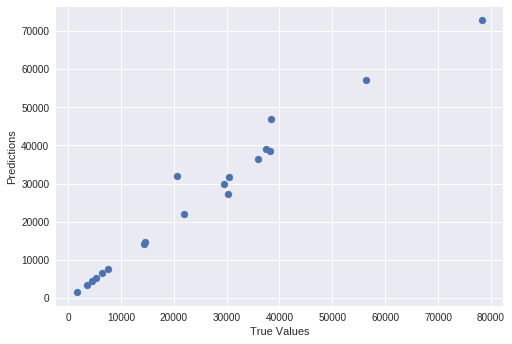

In [244]:
plt.scatter(y_test.values, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')